In [10]:
%load_ext dotenv
%dotenv 
import os 

The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


In [11]:
import quandl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from datetime import date, timedelta

quandlkey = os.getenv("QUANDLKEY")
quandl.ApiConfig.api_key = quandlkey

## Analysis of SIPEF vs Palm Oil price


SIPEF is a agro-industrial company with headquarters in Belgium and operations in Indonesia, Papa New Guinea and Ivory Coast. The company was founded in 1919 and it operates a number of plantations which produce mainly palm oil (90% of planted ha), rubber (7%), tea (2%) and bananas (1%). It is a top 20 producer of palm oil worldwide and its stock price (see https://finance.yahoo.com/quote/SIP.BR)  is driven by the price of palm oil and the production.

<img src="palmoilcompetitors.PNG" />

Source: https://www.sipef.com/media/1796/2018-02-16_financial_statements.pdf 


In [12]:
#Data for SIPEF is only availabe on Quandl from 2014-02-14 
# whereas palm oil data is available earlier - let's do  a comparison from 2014-02-28
data = quandl.get(["EURONEXT/SIP.4","ODA/PPOIL_USD"],start_date='2014-02-28')
data.head()


,EURONEXT/SIP - Last,ODA/PPOIL_USD - Value
Date,,
2014-02-28,60.00,811.204668
2014-03-05,60.62,NaN
2014-03-06,60.31,NaN
2014-03-07,60.15,NaN
2014-03-10,60.80,NaN


In [13]:
#For palm oil prices we only have monthly data so do a forward fill to fill nan values
data.fillna(method='ffill',inplace=True)
#Rename column names 
data.rename(columns={'EURONEXT/SIP - Last': 'SIP', 'ODA/PPOIL_USD - Value': 'PPOIL'},inplace=True)
data.tail(10)

,SIP,PPOIL
Date,,
2020-08-20,45.60,610.495598
2020-08-21,46.10,610.495598
2020-08-24,45.65,610.495598
2020-08-25,46.00,610.495598
2020-08-26,45.75,610.495598
2020-08-27,45.60,610.495598
2020-08-28,45.00,610.495598
2020-08-31,45.10,610.495598
2020-09-01,45.05,610.495598


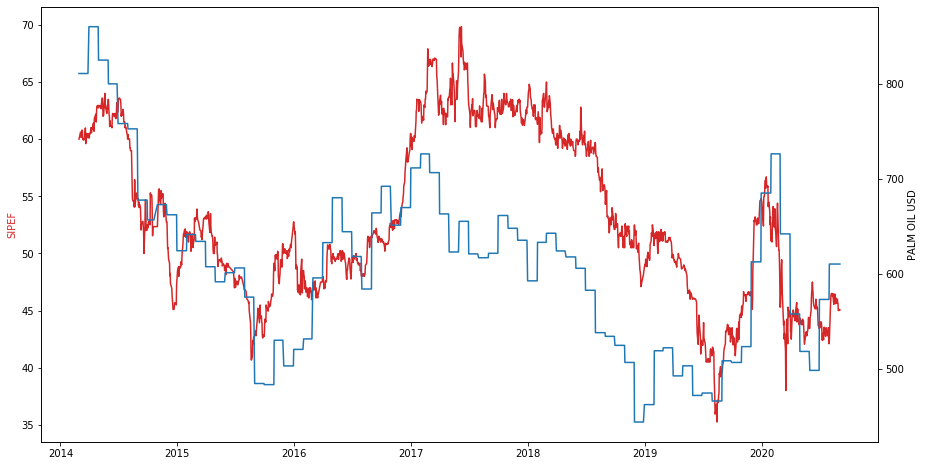

In [14]:
sipcolor = 'tab:red'
fig,ax1 = plt.subplots()

ax1.plot(data['SIP'],color=sipcolor)
ax1.set_ylabel('SIPEF',color=sipcolor)
#Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()
ax2.plot(data['PPOIL'])
ax2.set_ylabel('PALM OIL USD')
plt.gcf().set_size_inches(15,8)
plt.show()

### Correlation between stock price and palm oil price (work in progress)

Start with Pearson Correlation which is a statistic which measures the linear correlation between two variables x and y - in this case SIPEF's stock price and price of palm oil. Generally a value of r greater than 0.7 is considered a strong correlation, anything between 0.5 and 0.7 is moderate correlation. ¨P-value determines the statistical significance in a hypothesis test - in this case the null hypothesis would be that Palm Oil price in USD and the stock price of SIPEF
are not correlated. A low p-value suggest that you date is unlikely with 0 a true null.

TODO: review https://towardsdatascience.com/eveything-you-need-to-know-about-interpreting-correlations-2c485841c0b8

In [15]:
r,p = stats.pearsonr(data['SIP'],data['PPOIL'])
print(f"Scipy computed Pearson r {r} and p-value {p}")


Scipy computed Pearson r 0.619260514020866 and p-value 4.779421942125024e-176


In [16]:
#Add production data palm oil (in tonnes) and planted hectarage
#Source: https://www.sipef.com/media/2221/sip-ar19-part-1-company-report-en.pdf
dfProduction = pd.DataFrame(columns=['year','production','planted'])
dfProduction = dfProduction.append({'year':2015,'production':238548,'planted':70359},ignore_index=True)
dfProduction = dfProduction.append({'year':2016,'production':246121,'planted':69438},ignore_index=True)
dfProduction = dfProduction.append({'year':2017,'production':272312,'planted':78213},ignore_index=True)
dfProduction = dfProduction.append({'year':2018,'production':290441,'planted':79787},ignore_index=True)
dfProduction = dfProduction.append({'year':2019,'production':264641,'planted':82225},ignore_index=True)

In [17]:
dfProduction['prodperha']= dfProduction['production']/dfProduction['planted']
print(dfProduction['prodperha'].mean())

3.455057239093475
